# Assignment 9: Bayesian Analysis

### Conditional Probability 

Q.1. Let's say there are about 8.6 million people living in New-York and about 56 % of them speak Spanish. Let's also assume there are about 7.5 billion people on earth.

If I randomly pick someone living on Earth (an Earthian?), what are the chances that this person is a Spanish speaking New-Yorker?

P( New Yorker | Earthling ) ~ .11%

P( Spanish Speaker | New Yorker ) ~ 56%

P( Spanish-speaking New Yorker | Earthling ) = .11% * 56% = .06%



Q.2 Explain in few terms what is Naive Bayes. What is it considered Naive?

Naive Bayes is a way to estimate the probability of something (eg: the occurence of an event) based off some other data (eg: the previous occurence of some related event). It is considered naive because it considers all input data as independent.

Q.3 Let's suppose we have a Deck of Cards (52 cards). We pick a card at random. What is the probability of the card we picked being a king, given that it is a face card. 

P( King | Face card ) = 4/12 = 33%

In [12]:
import pandas as pd

data = pd.read_csv('shingles.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 6 columns):
Rash                       1841 non-null object
SwollenLymphNode           1841 non-null object
Chills                     1841 non-null object
PolymeraseChainReaction    1841 non-null object
VZVAntibodyTest            1841 non-null object
Blisters                   1841 non-null object
dtypes: object(6)
memory usage: 86.4+ KB
None


,Rash,SwollenLymphNode,Chills,PolymeraseChainReaction,VZVAntibodyTest,Blisters
0,no,no,no,no,pos,no
1,yes,no,no,no,neg,no
2,no,no,no,no,neg,no
3,no,no,no,no,neg,no
4,no,no,no,no,neg,no


Q.4. Does this data contain any missing values?

In [13]:
data.isnull().sum()

# No nulls

Rash                       0
SwollenLymphNode           0
Chills                     0
PolymeraseChainReaction    0
VZVAntibodyTest            0
Blisters                   0
dtype: int64

Q.5. Split the data into 70/30 train test

In [14]:
# refactor all variables as binary first

target =  'VZVAntibodyTest'
features = list(data.drop(target,axis=1).columns.values)

cols = data.columns

for c in cols:
    data[c] = data[c].replace({'yes':1,'pos':1,'po':1,'neg':0,'no':0})

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

X = data[features]
y = data[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=314)

Q.6. Train a Gaussian Naive Bayes model, a Multinomial Naive Bayes and a Bernoulli Naive Bayes on the dataset. Compute the accuracy for each. Explain your results. 

#### All three models perform very similarly, and none perform very well. The Bernoulli model performs slightly differently, which makes sense. The Bernoulli NB implementation specifically handles class data like what we have here, while the other aren't specialized for that kind of data.

In [16]:
bern = BernoulliNB(binarize=True)
bern.fit(X_train,y_train)
bern_pred = bern.predict(X_test)
print('Bernoulli NB Accuracy: {}'.format(accuracy_score(y_test,bern_pred).round(3)))

Bernoulli NB Accuracy: 0.588


In [17]:
multi = MultinomialNB(alpha=.0000001)
multi.fit(X_train,y_train)
multi_pred = multi.predict(X_test)
print('Multinomial NB Accuracy: {}'.format(accuracy_score(y_test,multi_pred).round(7)))

Multinomial NB Accuracy: 0.596745


In [18]:
gauss = GaussianNB()
gauss.fit(X_train,y_train)
gauss_pred = gauss.predict(X_test)
print('Gaussian NB Accuracy: {}'.format(accuracy_score(y_test,gauss_pred).round(7)))

Gaussian NB Accuracy: 0.596745


## Inference in Bayesian networks

Q.7. Imagine you are at party on Sunday and have an exam on Monday.  If you drink
too much alcolhol at the birthday party, you most likely have problems concentrating the next day, which
would reduce the probability that you pass the exam.  Another consequence of the reduced concentration
might be increased stress with your roommate.

Consider the following random variables that can assume the values "true" or "false":
A:  drinking too much alcolhol on Sunday;
B:  Dairy allergy strikes;
C:  reduced concentration on Monday;
D:  you pass the exam;
E:  stress with your roommates.

a) Draw the corresponding Bayesian network.

b) Search for conditional dependencies and independencies.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_circle(ax_, x_, y_, lx_, ly_, label_):
    ax_.add_artist(plt.Circle((x_, y_), 0.13, color='blue', fill=False, linewidth=2))
    ax_.text(lx_, ly_, label_, size=15, horizontalalignment='center')

def plot_arrow(ax_, x_, y_, dx_, dy_):
    ax_.arrow(x_, y_, dx_, dy_, head_width=0.02, head_length=0.02, fc='k', ec='k', linewidth=2)

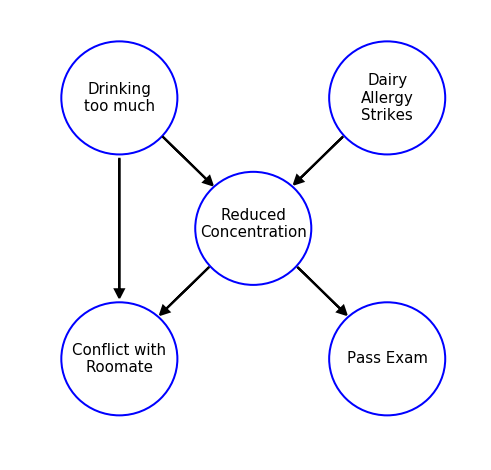

In [21]:
fig, ax = plt.subplots(figsize=(8,8))

plot_circle(ax, 0.2, 0.8, 0.2, 0.77, 'Drinking\ntoo much')
plot_circle(ax, 0.5, 0.5, 0.5, 0.48, 'Reduced\nConcentration')
plot_circle(ax, 0.8, 0.8, 0.8, 0.75, 'Dairy\nAllergy\nStrikes')
plot_circle(ax, 0.2, 0.2, 0.2, 0.17, 'Conflict with\nRoomate')
plot_circle(ax, 0.8, 0.2, 0.8, 0.19, 'Pass Exam')

plot_arrow(ax, 0.298, 0.71, 0.097, -0.097)
plot_arrow(ax, 0.6, 0.41, 0.095, -0.095)
plot_arrow(ax, 0.7, 0.71, -0.095, -0.095)
plot_arrow(ax, 0.4, 0.41, -0.095, -0.095)
plot_arrow(ax, 0.2, 0.66, 0, -.3)

plt.axis('off')
plt.show()

```sequence
Obviously drinking too much will effect concentration which will impact odds of passing exams, which will lead to more stress in general, and with roommates.

An allergy problem could also cause problems with concentration, impacting exam results, and therefore stress. However, there is no direct relationship between allergies and roommates.
```